In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(158, 10)


In [5]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [6]:
data1 = data.drop(['Unnamed: 0', "Temp C"], axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [7]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [8]:
data1.rename({'Solar.R': 'Solar'},axis=1, inplace=True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

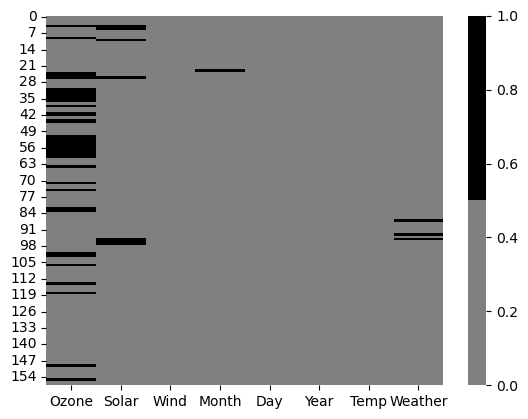

In [10]:
cols = data1.columns
colours = ['grey', 'black']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [11]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [12]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [13]:
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
print("Median of Solar: ", median_solar)
print("Mean of Solar: ", mean_solar)

Median of Solar:  197.0
Mean of Solar:  185.40397350993376


In [14]:
data1['Solar'] = data1['Solar'].fillna(median_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [16]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [17]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [19]:
data1.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,30.5,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S
157,18.0,131.0,8.0,9.0,29,2010,76,C


In [20]:
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,30.5,197.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,30.5,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


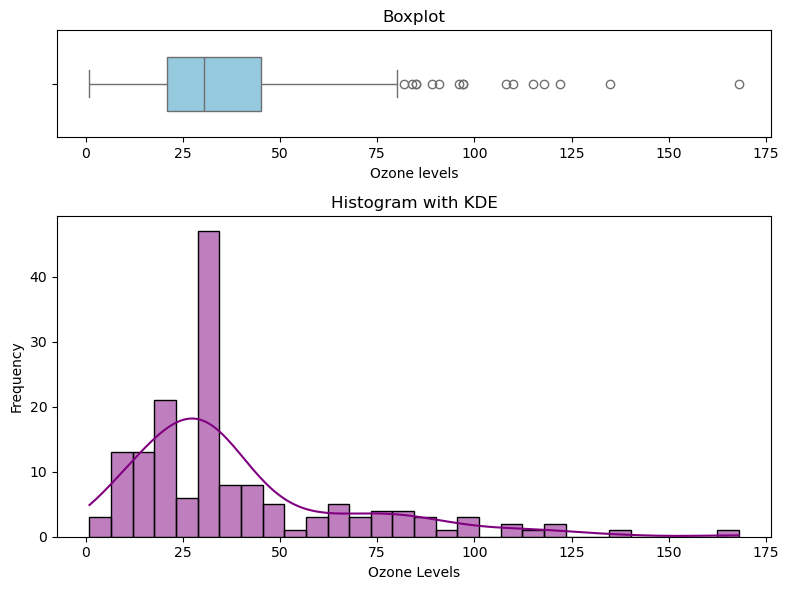

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1,3]})

sns.boxplot(data=data1["Ozone"],ax=axes[0], color='skyblue', width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone levels")
sns.histplot(data1["Ozone"],kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

In [30]:
sns.violinplotaxes(data=data1["Ozone"], color = 'lightgreen')
plt.title("Violin plot")

AttributeError: module 'seaborn' has no attribute 'violinplotaxes'

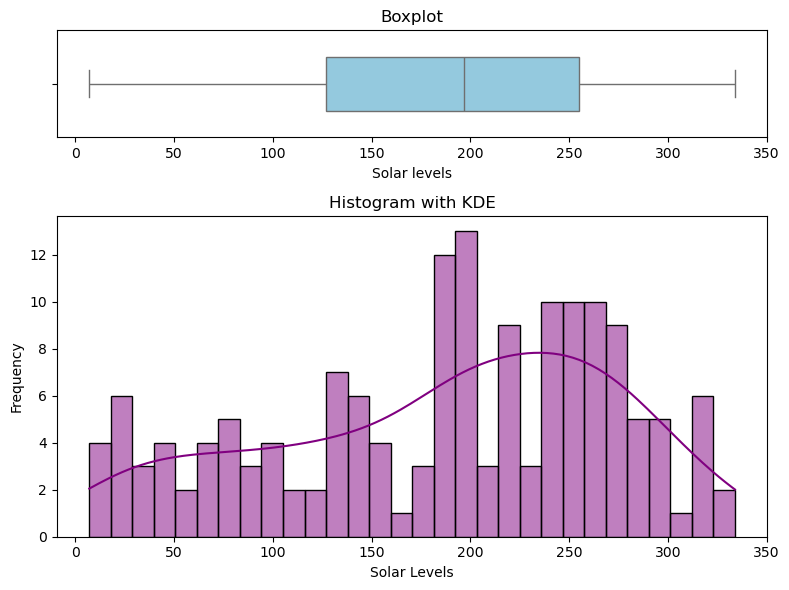

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1,3]})

sns.boxplot(data=data1["Solar"],ax=axes[0], color='skyblue', width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar levels")
sns.histplot(data1["Solar"],kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()